<a href="https://colab.research.google.com/github/gui-ferr/projetosTA/blob/main/Projetinho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correção dos datatypes

In [2]:
df = pd.read_csv('games.csv')
df.info()
#As colunas 12, 15 e 17 são da classe errada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   link             20422 non-null  object 
 10  critic_positive  20422 non-null  int64  
 11  critic_neutral   20422 non-null  int64  
 12  critic_negative  19084 non-null  float64
 13  metascore        20422 non-null  int64  
 14  user_positive    20422 non-null  int64  
 15  user_neutral     20409 non-null  float64
 16  user_negative    20422 non-null  int64  
 17  user_score  

In [3]:
#A coluna de links não presta pra análise:
df.drop(['link'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   critic_positive  20422 non-null  int64  
 10  critic_neutral   20422 non-null  int64  
 11  critic_negative  19084 non-null  float64
 12  metascore        20422 non-null  int64  
 13  user_positive    20422 non-null  int64  
 14  user_neutral     20409 non-null  float64
 15  user_negative    20422 non-null  int64  
 16  user_score       20422 non-null  object 
dtypes: float64(2

In [4]:
#Mudando o nome da coluna "genre(s)" porque os parenteses causam problemas mais tarde
df.rename(columns = {'genre(s)':'genre'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre            20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   critic_positive  20422 non-null  int64  
 10  critic_neutral   20422 non-null  int64  
 11  critic_negative  19084 non-null  float64
 12  metascore        20422 non-null  int64  
 13  user_positive    20422 non-null  int64  
 14  user_neutral     20409 non-null  float64
 15  user_negative    20422 non-null  int64  
 16  user_score       20422 non-null  object 
dtypes: float64(2

Correção dos Datatypes:

---
1.   Corrigir os NANs das colunas 11 e 14 pra...
2.   ... converter elas pra int64
---
3.   Mudar os  "tbd" da coluna 16 pra metascore/10
4.   Mesma coisa pra NAN se tiver
5.   Converter pra float64



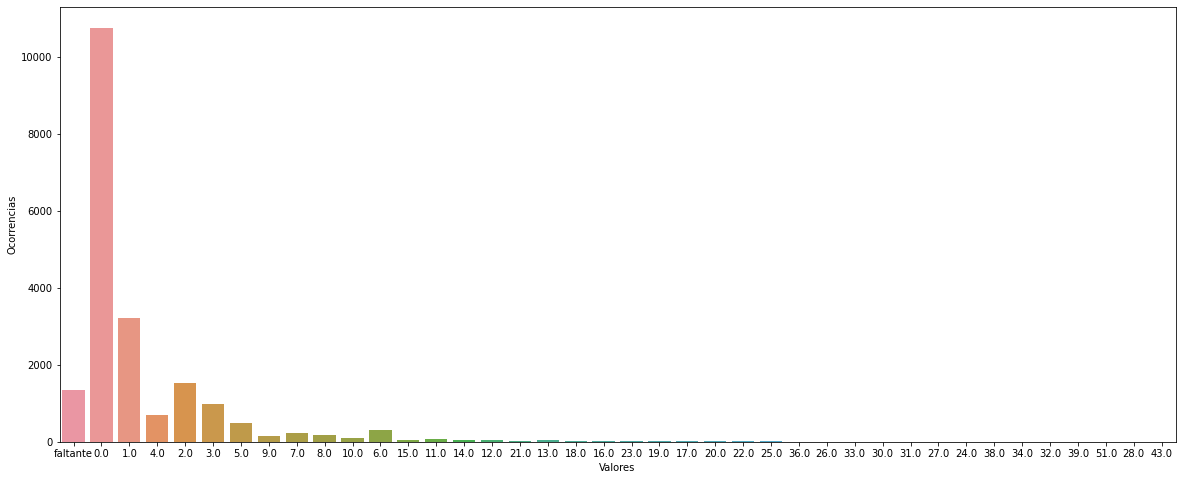

In [5]:
# 1. Correção dos NANS
#Vendo a proporção de NaNs da coluna 11 
df['critic_negative'].replace(to_replace=np.NAN,value='faltante',inplace=True)
plt.figure(figsize=(20,8))
sns.countplot(x=df['critic_negative'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()

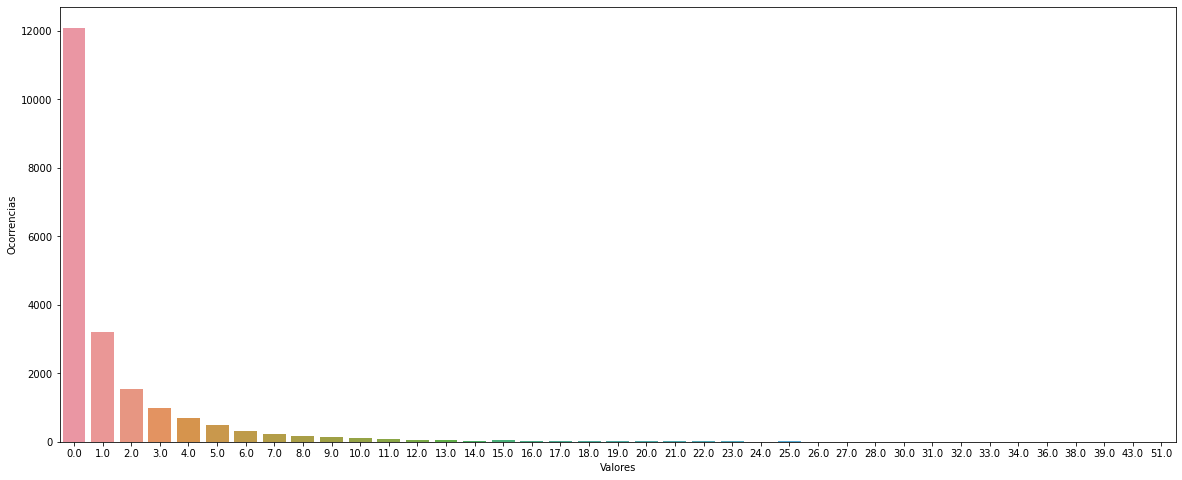

In [6]:
#Observando a quantidade deles e a natureza do dataframe, decidi substituir eles por 0 (moda)
df['critic_negative'].replace(to_replace='faltante',value=0.0,inplace=True)
plt.figure(figsize=(20,8))
sns.countplot(x=df['critic_negative'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()

In [7]:
#Coluna 14:
sum(df['user_neutral'].isna())
#como o numero de NaNs nessa coluna é ínfimo, decidi dropar as linhas

13

In [8]:
#Excluindo as linhas:
Nans_user_neutral = df[df['user_neutral'].isna()].index
df.drop(Nans_user_neutral , inplace=True)
sum(df['user_neutral'].isna())

0

In [9]:
# 2. Correção da classe das colunas 11 e 14: 
df[['user_neutral', 'critic_negative']] = df[['user_neutral', 'critic_negative']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 1 to 20421
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             20409 non-null  object
 1   platform         20409 non-null  object
 2   developer        20351 non-null  object
 3   publisher        20380 non-null  object
 4   genre            20409 non-null  object
 5   players          13187 non-null  object
 6   rating           18126 non-null  object
 7   attribute        324 non-null    object
 8   release_date     20409 non-null  object
 9   critic_positive  20409 non-null  int64 
 10  critic_neutral   20409 non-null  int64 
 11  critic_negative  20409 non-null  int64 
 12  metascore        20409 non-null  int64 
 13  user_positive    20409 non-null  int64 
 14  user_neutral     20409 non-null  int64 
 15  user_negative    20409 non-null  int64 
 16  user_score       20409 non-null  object
dtypes: int64(7), object(10)
memory 

In [10]:
# 3. Coluna 16
sum(df['user_score'] == 'tbd')
#o número de TBDs é muito grande pra ser ignorado,
#então pensei numa solução: fazer do user score o metascore/10.
#Os jogos com tbd são menos bem avaliados e por isso, mais desconhecidos. Isso
#diminui em muito a chance de gerar um user score alto artificialmente assim

2595

In [11]:
#Correção dos TBDs
df.loc[df['user_score'] == 'tbd','user_score'] = df.loc[df['user_score'] == 'tbd','metascore']/10
sum(df['user_score'] == 'tbd')

0

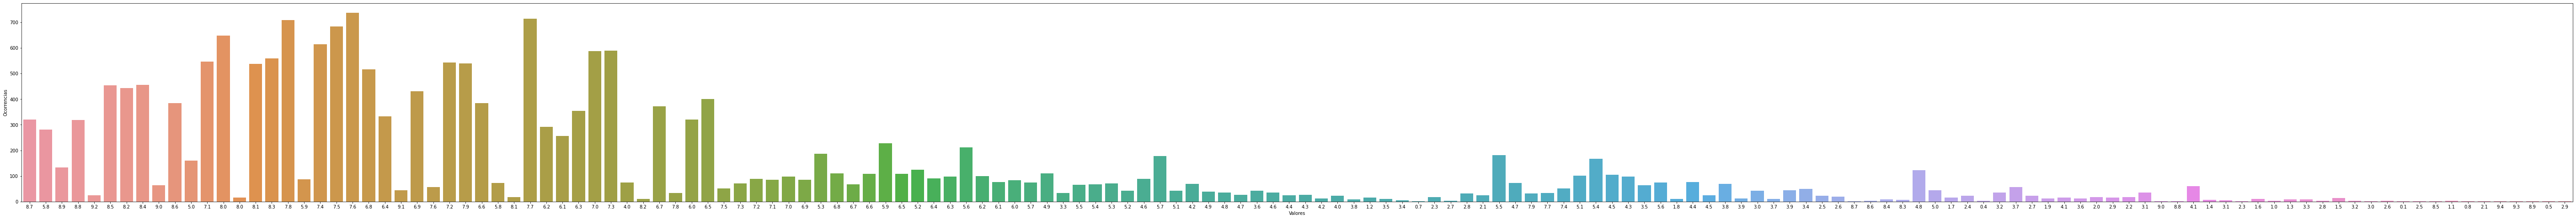

In [12]:
plt.figure(figsize=(100,8))
sns.countplot(x=df['user_score'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()
#Pelo gráfico, se percebe que existem notas que estão como strings, ao invés de floats

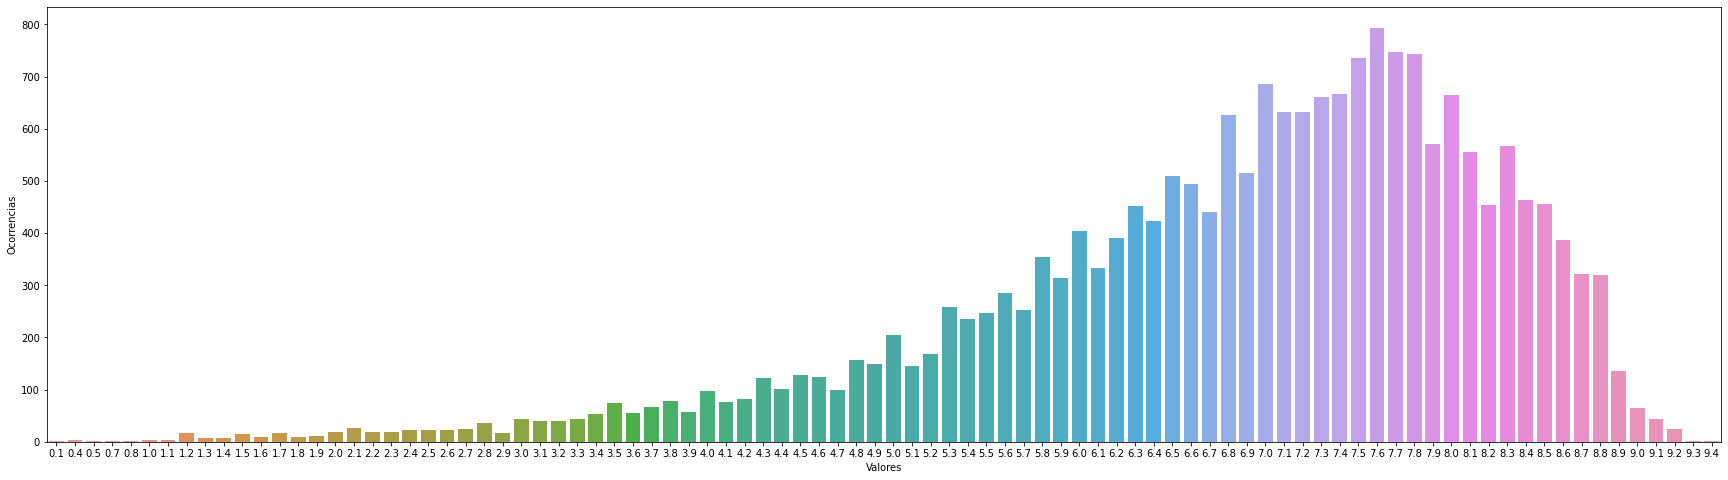

In [13]:
#Correção das strings pra floats
pd.to_numeric(df['user_score'])
df[['user_score']] = df[['user_score']].astype('float64')

plt.figure(figsize=(30,8))
sns.countplot(x=df['user_score'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 1 to 20421
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20409 non-null  object 
 1   platform         20409 non-null  object 
 2   developer        20351 non-null  object 
 3   publisher        20380 non-null  object 
 4   genre            20409 non-null  object 
 5   players          13187 non-null  object 
 6   rating           18126 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20409 non-null  object 
 9   critic_positive  20409 non-null  int64  
 10  critic_neutral   20409 non-null  int64  
 11  critic_negative  20409 non-null  int64  
 12  metascore        20409 non-null  int64  
 13  user_positive    20409 non-null  int64  
 14  user_neutral     20409 non-null  int64  
 15  user_negative    20409 non-null  int64  
 16  user_score       20409 non-null  float64
dtypes: float64(1

Finalizada a correção dos datatypes

# Correção das colunas individualmente

In [15]:
df.describe(include=['object'])
#Nada fora do esperado a primeiro momento

,name,platform,developer,publisher,genre,players,rating,attribute,release_date
count,20409,20409,20351,20380,20409,13187,18126,324,20409
unique,13243,22,4741,2230,69,53,9,11,4322
top,Madden NFL 07,PC,Capcom,Ubisoft,Action,No Online Multiplayer,E,PlayStation VR Required,"Nov 14, 2006"
freq,10,4372,299,907,7107,3883,5909,75,56


In [16]:
df.platform.unique()
#Alguns problemas: "churrasturing", "xBoX" e "pc"

array(['PC', 'PS', 'pc', 'N64', 'DC', 'PS2',
       'quando vai ser o churrasturing?', 'XBOX', 'GBA', 'GC', 'xBoX',
       'DS', 'X360', 'PSP', 'WII', 'PS3', '3DS', 'VITA', 'WIIU', 'PS4',
       'XONE', 'Switch'], dtype=object)

In [17]:
#Corrigindo os valores
df["platform"].replace("pc", "PC", inplace=True)
df["platform"].replace("xBoX", "XBOX", inplace=True)
#Só pra deixar todos em maiúsculo bonitinho
df["platform"].replace("Switch", "SWITCH", inplace=True)

df.platform.unique()

array(['PC', 'PS', 'N64', 'DC', 'PS2', 'quando vai ser o churrasturing?',
       'XBOX', 'GBA', 'GC', 'DS', 'X360', 'PSP', 'WII', 'PS3', '3DS',
       'VITA', 'WIIU', 'PS4', 'XONE', 'SWITCH'], dtype=object)

In [18]:
#Agora pra corrigir esse churrasturing kkkkkkkkk
sum(df['platform'] == 'quando vai ser o churrasturing?')

48

In [19]:
#Como são só 48, e não são jogos muito importantes, sumi com as linhas
churras_platform = df[df['platform'] == 'quando vai ser o churrasturing?'].index
df.drop(churras_platform , inplace=True)
sum(df['platform'].isna())

0

In [20]:
#Corrigindo as colunas de developer/publisher
print(sum(df['developer'].isna()))
print(sum(df['publisher'].isna()))

58
29


In [21]:
#Como também são poucos, decidi tirar as linhas
Nans_developer = df[df['developer'].isna()].index
df.drop(Nans_developer , inplace=True)
Nans_publisher = df[df['publisher'].isna()].index
df.drop(Nans_publisher , inplace=True)
print(sum(df['developer'].isna()))
print(sum(df['publisher'].isna()))

0
0


In [22]:
#A única anomalia é esse verso da Valesca Popozuda
print(df.genre.unique())
print(sum(df['genre'] == 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO'))

['Adventure' 'Action' 'Strategy' 'Role-Playing' 'Driving'
 'Action Adventure' 'Miscellaneous' 'Simulation' 'Sports'
 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO'
 'Puzzle' "Beat-'Em-Up" 'General' 'First-Person' 'Sci-Fi' 'Pinball'
 'Wargame' 'Modern' 'Shooter' 'Fantasy' 'Compilation' 'Action RPG'
 'Dancing' 'Street' 'PC-style RPG' 'Music' 'Sim' 'Platformer'
 'Rally / Offroad' 'Board Games' 'Olympic Sports' 'Formula One' 'WWII'
 'Massively Multiplayer Online' 'Ice Hockey' 'Horror' 'GT / Street'
 'Music Maker' 'Historic' 'Fighting' 'Edutainment' 'Tycoon' 'Alternative'
 'Arcade' '3D' 'Party' 'Card Battle' 'Tactical' 'Console-style RPG'
 'Traditional' 'Third-Person' 'WWI' 'Virtual Life' 'Real-Time' 'Scrolling'
 'Flight' 'Racing' 'City Building' '2D' 'Japanese-Style'
 'Breeding/Constructing' 'Military' 'MOBA' 'Futuristic' 'Western-Style'
 '4X' 'Turn-Based' 'Rail' 'Other']
4


In [23]:
#Como só tem 4 ocorrências, vou tirar as linhas
genre_valesca = df[df['genre'] == 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO'].index
df.drop(genre_valesca , inplace=True)
sum(df['genre'] == 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO')

0

In [24]:
df.players.unique()
#Essa coluna é complicada... 1/3 é dado faltante que não parece seguir nenhum padrao
#Além disso, existe muita coisa redundante:
#"Up to more than 64", "64+", "64 Online", "Up to 64"
#Decidi não mexer nela pela complexidade e por eu achar que ela não tem informação mto importante

array([nan, '1-2 ', '1 Player', '1-16 ', '1-4 ', '1-6 ', '1-8 ', '1-5 ',
       '1-32 ', 'No Online Multiplayer', '1-10 ', 'Massively Multiplayer',
       'Online Multiplayer', 'Up to 6 ', 'Up to 8 ', 'Up to 20 ', '1-3 ',
       '1-12 ', 'Up to 16 ', '64  Online', '1-64 ', 'Up to 4 ',
       '8  Online', '2  Online', '4  Online', '32  Online', '10  Online',
       '6  Online', '64+  Online', '16  Online', '12  Online', '64+ ',
       '14  Online', '1-24 ', '24  Online', 'Up to 64 ', '44  Online',
       'Up to 60 ', '5  Online', 'Up to 40 ', 'Up to 12 ', 'Up to 32 ',
       'Up to 14 ', 'Up to 24 ', 'Up to 18 ', '2 ', 'Up to 10 ',
       '3  Online', 'Up to 22 ', 'Up to 3 ', 'Up to 5 ', 'Up to 30 ',
       'Up to more than 64 ', 'Up to 9 '], dtype=object)

In [25]:
#"Aceitas pix"??
df.rating.unique()

array([nan, 'T', 'K-A', 'M', 'E', 'aceitas pix', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

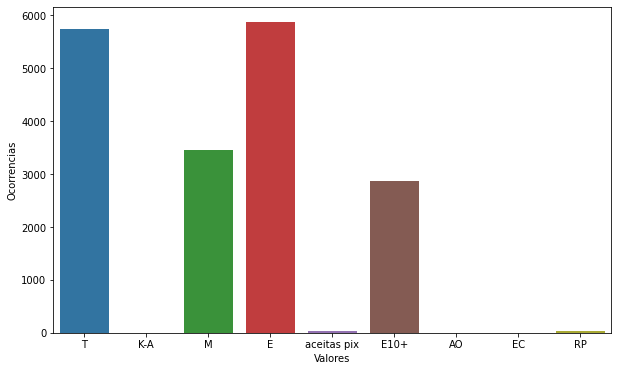

In [26]:
#Explorando mais a fundo...
plt.figure(figsize=(10,6))
sns.countplot(x=df['rating'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()

In [27]:
#Pesquisando sobre os ratings, descobri que "AO" é quase equivalente ao "M",
#que "EC" e "K-A" são classificações equivalentes a "E".
df["rating"].replace("AO", "M", inplace=True)
df["rating"].replace("EC", "E", inplace=True)
df["rating"].replace("K-A", "E", inplace=True)

In [28]:
#Olhando pras linhas sujadas pelo "aceitas pix", fiz um juizo de valor e decidi
#substituir elas por "E10+". Isso pq os dois jogos mais bem avaliados e por isso,
#significativos, eram Super Mario Galaxy 2 e Portal 2, os quais caem perto do rating E10+.
#Informações importantes pra análise seriam excluidas caso essas linhas fossem ignoradas.
print(sum(df['rating'] == 'aceitas pix'))
df["rating"].replace("aceitas pix", "E10+", inplace=True)
print(sum(df['rating'] == 'aceitas pix'))

37
0


In [29]:
#Quanto ao "RP" (Rating pending), não existem muitos jogos com essa classificação, além de que os que tem
#"RP" não são muito significativos também. Por isso vou tirar eles
print(sum(df['rating'] == 'RP'))
rating_RP = df[df['rating'] == 'RP'].index
df.drop(rating_RP , inplace=True)
print(sum(df['rating'] == 'RP'))

25
0


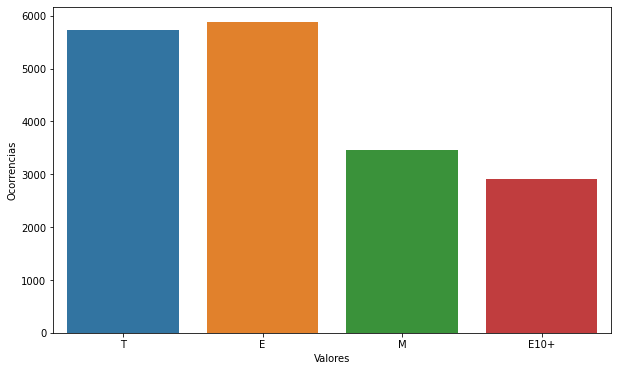

In [30]:
#Concluindo
plt.figure(figsize=(10,6))
sns.countplot(x=df['rating'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()

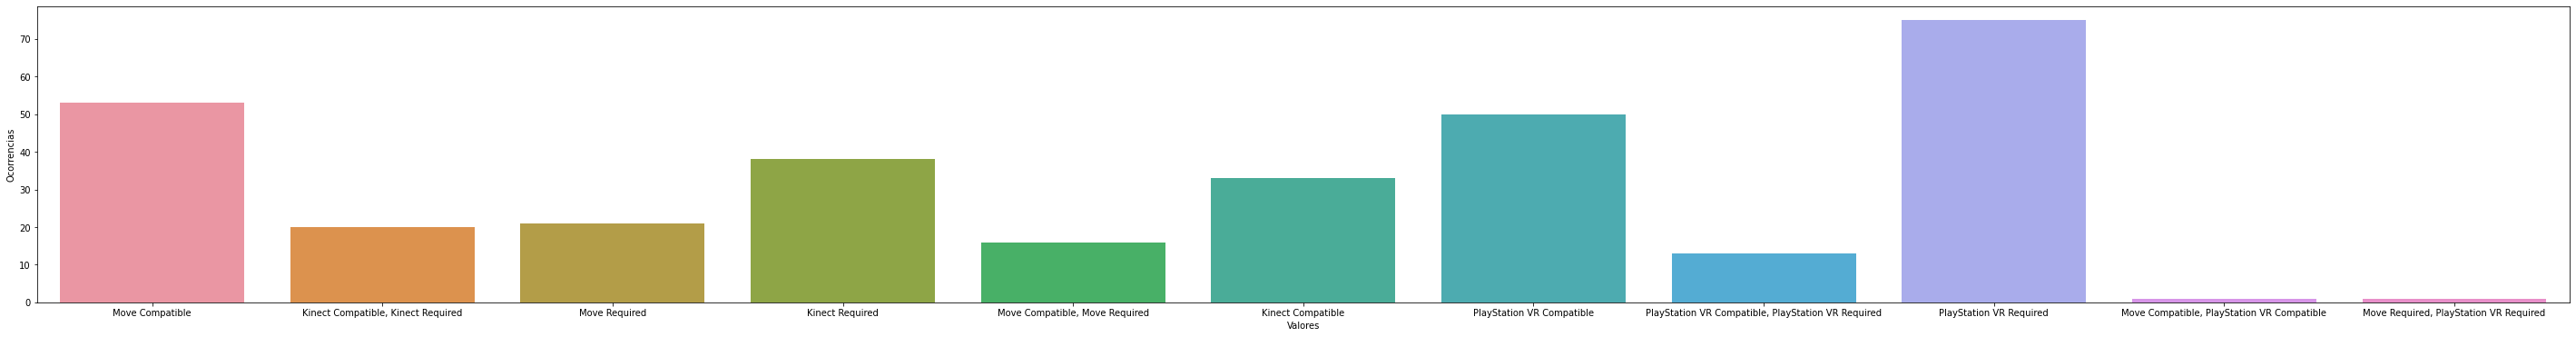

In [31]:
plt.figure(figsize=(50,6))
sns.countplot(x=df['attribute'])
plt.xlabel("Valores")
plt.ylabel("Ocorrencias")
plt.show()

In [32]:
df.attribute.unique()
#Sem nenhum problema aqui

array([nan, 'Move Compatible', 'Kinect Compatible, Kinect Required',
       'Move Required', 'Kinect Required',
       'Move Compatible, Move Required', 'Kinect Compatible',
       'PlayStation VR Compatible',
       'PlayStation VR Compatible, PlayStation VR Required',
       'PlayStation VR Required',
       'Move Compatible, PlayStation VR Compatible',
       'Move Required, PlayStation VR Required'], dtype=object)

In [34]:
#Agora pra corrigir as colunas numéricas
df.describe(include=['int64'])

,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
count,20246.000000,20246.000000,20246.000000,20246.000000,20246.000000,20246.000000,20246.000000
mean,10.842191,7.246567,1.426306,68.846488,16.934506,4.619480,6.397412
std,15.026363,7.252654,3.100758,13.252479,71.991929,16.335312,51.972415
min,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,61.000000,1.000000,0.000000,0.000000
50%,5.000000,5.000000,0.000000,71.000000,3.000000,1.000000,1.000000
75%,14.000000,10.000000,2.000000,78.000000,10.000000,3.000000,3.000000
max,118.000000,60.000000,51.000000,99.000000,3029.000000,507.000000,3001.000000


In [35]:
#As colunas user parecem ter valores altos demais, mas vamos checar se na verdade são jogos grandes
df_userpos = df.sort_values('user_positive', ascending=False)
df_userpos.head(15)
#São outliers naturais. Nada a corrigir

,name,platform,developer,publisher,genre,players,rating,attribute,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
17158,The Legend of Zelda: Breath of the Wild,SWITCH,Nintendo,Nintendo,Action Adventure,No Online Multiplayer,E10+,NaN,"Mar 3, 2017",106,3,0,97,3029,271,149,8.6
18709,God of War,PS4,SCE Santa Monica,Sony Interactive Entertainment,Action Adventure,No Online Multiplayer,M,NaN,"Apr 20, 2018",118,0,0,94,2760,128,131,9.1
12417,Dota 2,PC,Valve Software,Valve Software,General,Up to 10,NaN,NaN,"Jul 9, 2013",32,1,0,90,1788,122,1675,6.5
3063,Half-Life 2,PC,Valve Software,VU Games,Action,No Online Multiplayer,M,NaN,"Nov 16, 2004",81,0,0,96,1758,140,110,9.1
18707,Red Dead Redemption 2,PS4,Rockstar Games,Rockstar Games,Action Adventure,Up to 32,M,NaN,"Oct 26, 2018",97,1,0,97,1753,328,379,8.1
10316,Portal 2,PC,Valve Software,Valve Software,Action,NaN,E10+,NaN,"Apr 18, 2011",51,1,0,95,1713,108,19,9.0
12400,The Last of Us,PS3,Naughty Dog,SCEA,Modern,Up to 8,M,NaN,"Jun 14, 2013",97,1,0,95,1641,141,61,9.2
10320,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Bethesda Softworks,Role-Playing,No Online Multiplayer,M,NaN,"Nov 10, 2011",32,0,0,94,1630,324,452,8.2
15701,Uncharted 4: A Thief's End,PS4,Naughty Dog,SCEA,General,Up to 10,T,NaN,"May 10, 2016",111,1,1,93,1600,152,75,8.4
14471,The Witcher 3: Wild Hunt,PC,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,No Online Multiplayer,M,NaN,"May 18, 2015",32,0,0,93,1377,90,78,9.4


In [36]:
df_userneut = df.sort_values('user_neutral', ascending=False)
df_userneut.head(15)
#Nada errado também

,name,platform,developer,publisher,genre,players,rating,attribute,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
11432,Diablo III,PC,Blizzard Entertainment,Blizzard Entertainment,Role-Playing,Up to 4,M,NaN,"May 15, 2012",81,4,1,88,1181,507,3001,4.1
13750,Destiny,PS4,"Bungie Software, Bungie",Activision,Shooter,Up to 16,T,NaN,"Sep 9, 2014",60,34,0,76,775,498,554,6.1
10355,Call of Duty: Modern Warfare 3,X360,"Infinity Ward, Sledgehammer Games",Activision,Action,Up to 18,M,NaN,"Nov 8, 2011",79,2,0,88,1306,464,2546,3.4
14582,Fallout 4,PC,Bethesda Game Studios,Bethesda Softworks,General,No Online Multiplayer,M,NaN,"Nov 9, 2015",30,8,0,84,666,442,1123,5.5
11416,Mass Effect 3,PC,BioWare,Electronic Arts,Role-Playing,Up to 4,M,NaN,"Mar 6, 2012",23,0,0,89,652,336,1037,5.8
18707,Red Dead Redemption 2,PS4,Rockstar Games,Rockstar Games,Action Adventure,Up to 32,M,NaN,"Oct 26, 2018",97,1,0,97,1753,328,379,8.1
10320,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Bethesda Softworks,Role-Playing,No Online Multiplayer,M,NaN,"Nov 10, 2011",32,0,0,94,1630,324,452,8.2
12402,BioShock Infinite,PC,Irrational Games,2K Games,Action,No Online Multiplayer,M,NaN,"Mar 25, 2013",68,0,0,94,1117,303,150,8.6
13459,Dragon Age: Inquisition,PC,BioWare,Electronic Arts,PC-style RPG,Up to 4,M,NaN,"Nov 18, 2014",40,5,0,85,514,297,648,5.9
10467,Dragon Age II,PC,BioWare,Electronic Arts,Role-Playing,No Online Multiplayer,M,NaN,"Mar 8, 2011",38,7,0,82,364,293,1021,4.5


In [37]:
df_userneg = df.sort_values('user_negative', ascending=False)
df_userneg.head(15)
#Só jogos desgostados mesmo

,name,platform,developer,publisher,genre,players,rating,attribute,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
11432,Diablo III,PC,Blizzard Entertainment,Blizzard Entertainment,Role-Playing,Up to 4,M,NaN,"May 15, 2012",81,4,1,88,1181,507,3001,4.1
10355,Call of Duty: Modern Warfare 3,X360,"Infinity Ward, Sledgehammer Games",Activision,Action,Up to 18,M,NaN,"Nov 8, 2011",79,2,0,88,1306,464,2546,3.4
18187,Star Wars Battlefront II,PS4,EA DICE,Electronic Arts,Action,Up to 40,T,NaN,"Nov 14, 2017",23,36,3,68,239,85,2049,1.2
13114,SimCity,PC,Maxis,Electronic Arts,Miscellaneous,NaN,E10+,NaN,"Mar 5, 2013",26,39,10,64,182,153,1721,2.2
12417,Dota 2,PC,Valve Software,Valve Software,General,Up to 10,NaN,NaN,"Jul 9, 2013",32,1,0,90,1788,122,1675,6.5
20314,Fallout 76,PC,Bethesda Game Studios,Bethesda Softworks,Role-Playing,Up to 24,M,NaN,"Nov 14, 2018",4,29,13,52,602,153,1541,2.7
12396,Infestation: Survivor Stories,PC,Hammerpoint Interactive,Arktos Entertainment,Massively Multiplayer Online,NaN,M,NaN,"Oct 15, 2012",0,0,13,20,215,82,1304,1.7
10359,Call of Duty: Modern Warfare 3,PS3,"Infinity Ward, Sledgehammer Games",Activision,Action,Up to 18,M,NaN,"Nov 8, 2011",38,1,0,88,708,260,1275,3.2
12639,Payday 2,PC,Overkill Software,505 Games,Action,Online Multiplayer,M,NaN,"Aug 13, 2013",40,11,0,79,282,75,1209,3.7
12746,Total War: Rome II,PC,Creative Assembly,Sega,Strategy,NaN,T,NaN,"Sep 2, 2013",49,15,7,76,351,222,1186,4.3


In [38]:
df.describe(include='float64')
#Tudo ok!

,user_score
count,20246.000000
mean,6.849402
std,1.393831
min,0.100000
25%,6.100000
50%,7.100000
75%,7.800000
max,9.400000


Finalizada a limpeza do dataset

# Análise

##Análise 1: Gêneros mais populares

Vou pegar os top N jogos (top 1000 por default) e contar a ocorrência dos gêneros. Acho que é uma análise simples mas significativa.

In [39]:
topjogos = 1000

df_analise1 = df.sort_values('user_score', ascending=False)
antitop = range(topjogos,20246)
df_analise1.reset_index(inplace=True)
df_analise1.drop(['index'], axis=1,inplace=True)
df_analise1.drop(antitop,inplace=True)
df_analise1

,name,platform,developer,publisher,genre,players,rating,attribute,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,The Witcher 3: Wild Hunt,PC,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,No Online Multiplayer,M,NaN,"May 18, 2015",32,0,0,93,1377,90,78,9.4
1,The Witcher 3: Wild Hunt - Hearts of Stone,XONE,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Role-Playing,NaN,M,NaN,"Oct 13, 2015",4,0,0,90,18,3,0,9.3
2,The Last of Us,PS3,Naughty Dog,SCEA,Modern,Up to 8,M,NaN,"Jun 14, 2013",97,1,0,95,1641,141,61,9.2
3,Deus Ex,PC,Ion Storm,Eidos Interactive,Action Adventure,Online Multiplayer,M,NaN,"Jun 23, 2000",28,0,0,90,242,10,9,9.2
4,Final Fantasy VII,PS,SquareSoft,SCEA,Role-Playing,1 Player,T,NaN,"Sep 3, 1997",20,0,0,92,365,34,15,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Star Wars Jedi Knight: Dark Forces II,PC,LucasArts,LucasArts,Action,1-32,NaN,NaN,"Sep 30, 1997",9,1,0,91,19,1,0,8.6
996,MVP 06 NCAA Baseball,PS2,EA Canada,EA Sports,Sports,2 Online,E,NaN,"Jan 18, 2006",18,8,1,76,5,0,0,8.6
997,Mobile Suit Gundam: Encounters in Space,PS2,Bandai,Bandai,Simulation,1-2,T,NaN,"Dec 5, 2003",3,5,2,66,24,4,2,8.6
998,Hot Shots Golf: Out of Bounds,PS3,Clap Hanz,SCEA,Sports,44 Online,E,NaN,"Mar 18, 2008",62,4,0,81,9,1,0,8.6


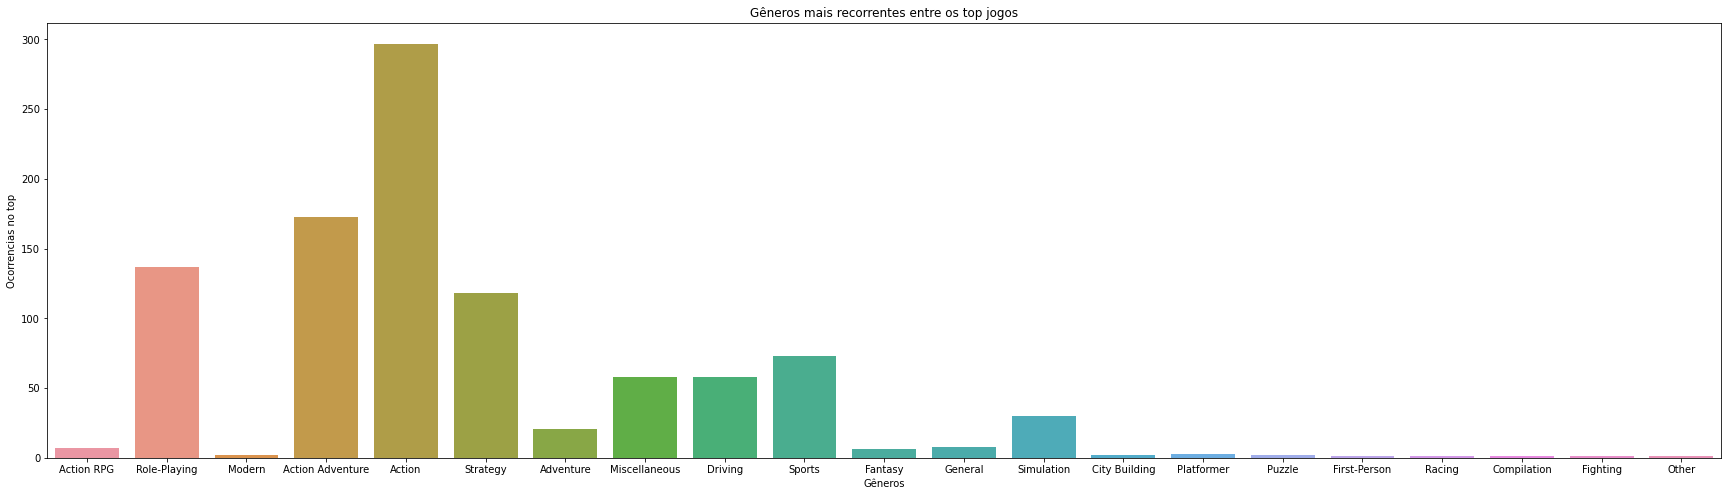

In [40]:
plt.figure(figsize=(30,8))
sns.countplot(x=df_analise1['genre'])
plt.title('Gêneros mais recorrentes entre os top jogos')
plt.xlabel("Gêneros")
plt.ylabel("Ocorrencias no top")
plt.show()

Nos top 500 jogos existe uma quantidade similar de jogos de RPG, Aventura e de Ação.
Mas se considerados os top 1000 ou 2000, o gênero de Ação dispara na frente, seguido de Aventura, RPG, Estratégia, Esportes e Direção.

Disso se pode concluir que, dentre os jogos mais bem avaliados pelos gamers, existe uma predominância dos gêneros de RPG, Ação, Aventura e Estratégia. 

Além disso, o volume desses 4 gêneros predominantes também indica que eles não são muito de nicho e por isso podem ser uma boa pra incluir todo mundo na próxima noite de jogos do Turing!!

##Análise 2: Publishers mais populares

Vou fazer essa análise com os publishers e não com os developers porque isso resolve o problema de que estúdios menores respondem a empresas maiores. Exemplo: Ubisoft Montreal, Ubisoft Toronto, Ubisoft Quebec... todas são da Ubisoft Studios.

Vou plotar só os top 20 publishers com mais jogos pra melhor visualização.

In [41]:
df_analise2 = df.groupby(['publisher']).mean()
df_analise2

,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
publisher,,,,,,,,
.400 Software Studios,4.000000,2.000000,0.000000,76.000000,2.000000,0.000000,0.000000,6.500000
10tacle Studios,24.000000,1.000000,0.000000,87.500000,18.000000,0.500000,0.500000,8.300000
10tons,2.560000,4.880000,0.280000,68.920000,0.920000,0.400000,0.080000,6.696000
10tons Entertainment,2.800000,5.000000,0.200000,68.400000,1.400000,0.200000,0.200000,6.900000
10tons Ltd,1.785714,5.500000,0.785714,65.214286,0.928571,0.500000,0.357143,6.228571
...,...,...,...,...,...,...,...,...
teedoubleuGAMES,5.000000,11.000000,0.000000,65.000000,0.000000,0.000000,0.000000,8.000000
tiny Build GAMES,1.600000,4.600000,2.000000,60.000000,2.400000,2.400000,1.000000,6.380000
tinyBuild,4.176471,4.352941,1.382353,67.764706,2.911765,2.323529,2.058824,6.726471


In [42]:
df_analise2_count = df.groupby(['publisher']).count()
df_analise2_count.rename(columns = {'name':'count'}, inplace = True)
df_analise2_count

,count,platform,developer,genre,players,rating,attribute,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
publisher,,,,,,,,,,,,,,,,
.400 Software Studios,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
10tacle Studios,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
10tons,25,25,25,25,13,23,0,25,25,25,25,25,25,25,25,25
10tons Entertainment,5,5,5,5,1,5,0,5,5,5,5,5,5,5,5,5
10tons Ltd,14,14,14,14,0,14,0,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teedoubleuGAMES,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
tiny Build GAMES,5,5,5,5,1,2,0,5,5,5,5,5,5,5,5,5
tinyBuild,34,34,34,34,24,21,0,34,34,34,34,34,34,34,34,34


In [43]:
#Fiz isso pra jogar na função do scatterplot mais fácil. Obg pela ajuda Rian <3
df_analise2 = df_analise2.join(df_analise2_count['count'])
df_analise2.sort_values('count', ascending=False, inplace=True)
df_analise2.reset_index(inplace=True)
df_analise2.drop(list(range(20,2218)), axis = 0, inplace=True)
df_analise2

,publisher,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score,count
0,Ubisoft,12.308546,8.350721,1.673696,68.599334,20.095450,7.475028,7.506104,6.813541,901
1,Activision,12.994878,8.636364,1.962868,67.404609,18.708067,8.323944,19.244558,6.389629,781
2,Electronic Arts,16.361035,7.850136,1.024523,73.269755,34.336512,11.844687,29.610354,6.591689,734
3,Nintendo,25.707401,9.967298,1.046472,76.036145,49.184165,7.555938,5.118761,7.788985,581
4,Sega,13.738302,9.537262,1.960139,71.043328,14.667244,4.772964,8.138648,7.321317,577
5,THQ,9.953445,8.137803,1.620112,65.411546,9.882682,3.044693,2.268156,6.870019,537
6,SCEA,23.197368,10.984962,1.278195,73.642857,48.518797,8.996241,6.778195,7.345489,532
7,Konami,9.311765,7.880392,2.184314,66.462745,13.623529,3.194118,3.254902,6.947647,510
8,Capcom,17.073922,9.045175,1.295688,73.632444,18.470226,4.691992,5.685832,7.398768,487
9,Microsoft Game Studios,23.431579,9.773684,1.331579,74.360526,35.989474,9.505263,9.444737,7.081579,380


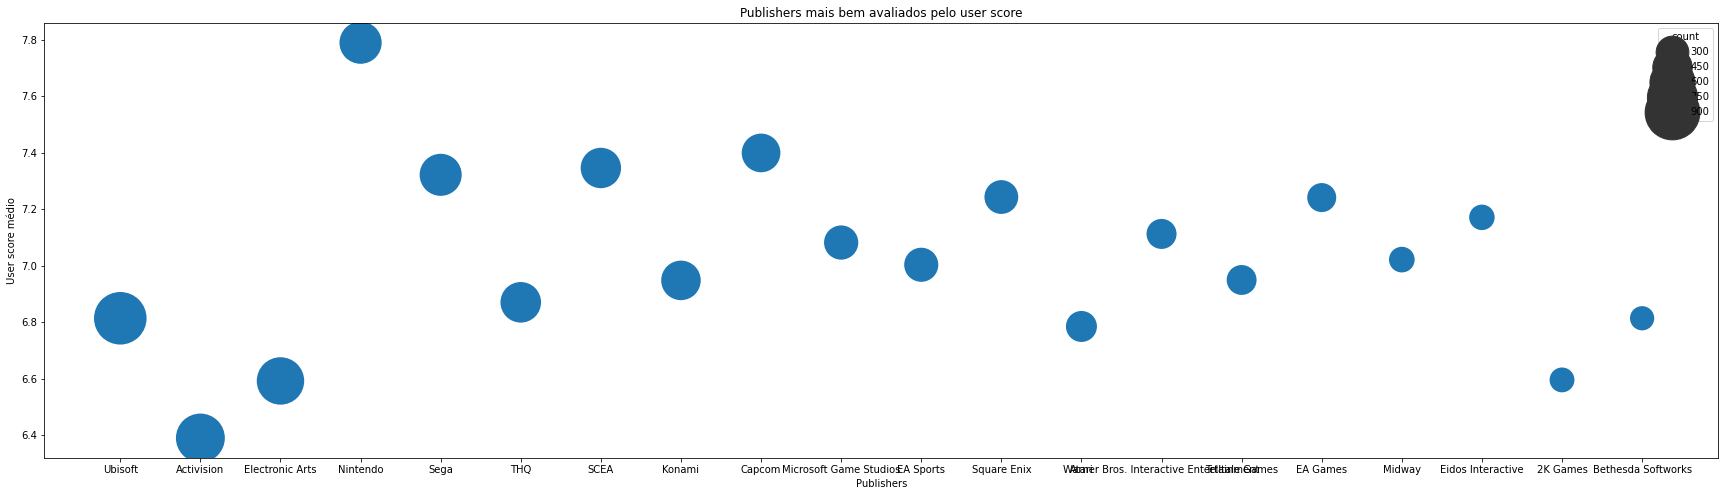

In [44]:
plt.figure(figsize=(30,8))
sns.scatterplot(data=df_analise2, y=df_analise2['user_score'], x=df_analise2['publisher'], size = df_analise2['count'], sizes = (700,3000))
plt.title('Publishers mais bem avaliados pelo user score')
plt.xlabel("Publishers")
plt.ylabel("User score médio")
plt.show()

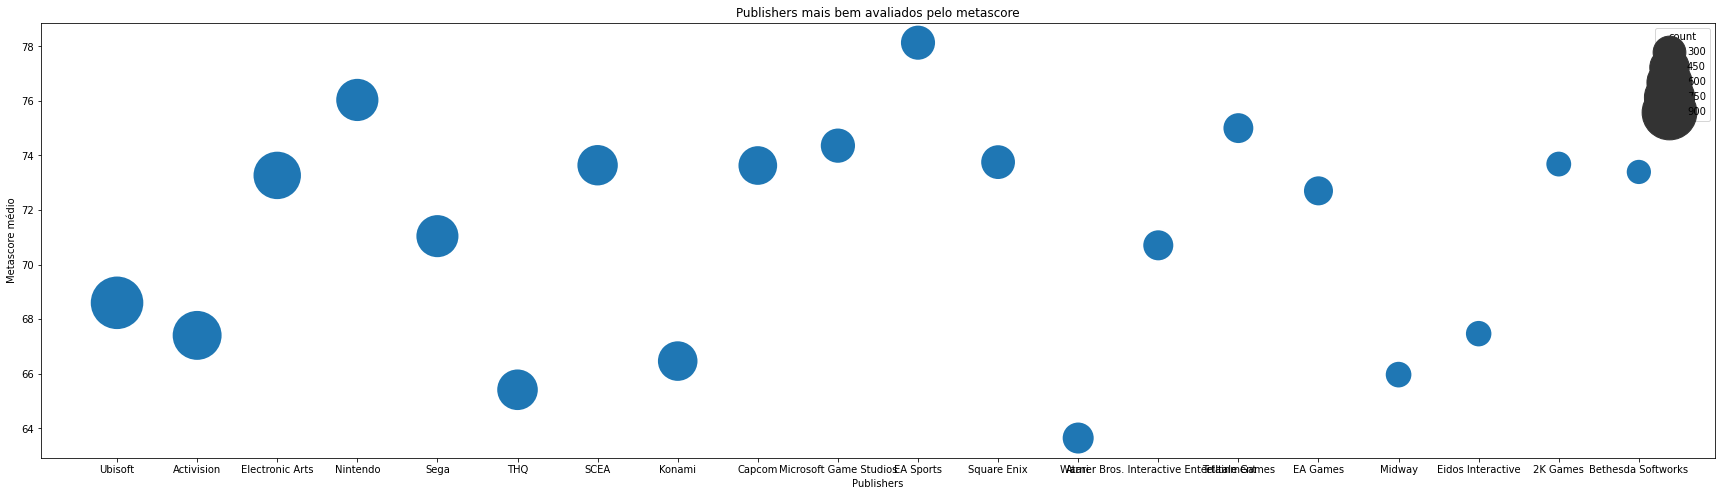

In [45]:
plt.figure(figsize=(30,8))
sns.scatterplot(data=df_analise2, y=df_analise2['metascore'], x=df_analise2['publisher'], size = df_analise2['count'], sizes = (700,3000))
plt.title('Publishers mais bem avaliados pelo metascore')
plt.xlabel("Publishers")
plt.ylabel("Metascore médio")
plt.show()

*O tamanho das bolas é proporcional ao volume de jogos publicado por cada empresa.



Usando a avaliação dos usuários como parâmetro, algumas publishers como a Sega, a Sony e a Capcom saem na frente das demais, mas a Nintendo é a vencedora com folga. 

Já usando a avaliação dos críticos, outras publishers se sobressaem, como a  Telltale Games e a Microsoft. A disparada da Electronic Arts causa uma surpresa, já que ela não se destacou tanto no user score, mas aqui ela ficou na frente até da Nintendo.

Analisando os dois gráficos em conjunto, pode se concluir que as 5 publishers mais queridas são a EA, Nintendo, Sega, Sony e a Capcom, mas a Nintendo é, sem dúvida, a que mais se destaca. 

Bônus: A disparidade das notas da EA entre os gráficos oferece uma conclusão interessante: a crítica não vê problema na fórmula da EA de "lançar o mesmo jogo todo ano", já que as notas são consistentemente boas. Já a maioria dos gamers não parece curtir essa fórmula tanto assim. Será que a crítica é previsível? Ou serão os gamers que são mais voláteis?

##Análise 3: Os grandes nomes!

Acho que seria legal ver a lista dos top jogos pelo user score e pelo metascore!

In [66]:
df_analise3 = df[['name','platform','genre','publisher','metascore','user_score']]
df_analise3

,name,platform,genre,publisher,metascore,user_score
1,Full Throttle,PC,Adventure,LucasArts,86,8.7
2,Battle Arena Toshinden,PS,Action,SCEA,69,5.8
3,Sid Meier's Civilization II,PC,Strategy,MicroProse,94,8.9
4,Quake,PC,Action,id Software,94,8.8
5,Diablo,PC,Role-Playing,Blizzard Entertainment,94,8.7
...,...,...,...,...,...,...
20416,Shaq Fu: A Legend Reborn,PC,Action,Saber Interactive,30,6.7
20417,ARK: Survival Evolved,SWITCH,Action Adventure,Studio Wildcard,29,2.4
20419,The Quiet Man,PS4,Action Adventure,Square Enix,28,2.1
20420,Awkward,SWITCH,Miscellaneous,Snap Finger Click Ltd,28,2.8


In [67]:
df_analise3.sort_values('user_score', ascending=False, inplace=True)
df_analise3.head(50)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,platform,genre,publisher,metascore,user_score
14471,The Witcher 3: Wild Hunt,PC,Action RPG,Warner Bros. Interactive Entertainment,93,9.4
14484,The Witcher 3: Wild Hunt - Hearts of Stone,XONE,Role-Playing,Warner Bros. Interactive Entertainment,90,9.3
12400,The Last of Us,PS3,Modern,SCEA,95,9.2
188,Deus Ex,PC,Action Adventure,Eidos Interactive,90,9.2
32,Final Fantasy VII,PS,Role-Playing,SCEA,92,9.2
138,Suikoden II,PS,Role-Playing,Konami,82,9.2
30,Castlevania: Symphony of the Night,PS,Action,Konami,93,9.2
65,Metal Gear Solid,PS,Action Adventure,Konami,94,9.2
5863,The Orange Box,PC,Action,EA Games,96,9.2
119,Planescape: Torment,PC,Role-Playing,Interplay,91,9.2


In [68]:
df_analise3.sort_values('metascore', ascending=False, inplace=True)
df_analise3.head(50)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,platform,genre,publisher,metascore,user_score
61,The Legend of Zelda: Ocarina of Time,N64,Action Adventure,Nintendo,99,9.1
162,Tony Hawk's Pro Skater 2,PS,Sports,Activision,98,7.5
6933,Grand Theft Auto IV,PS3,Action Adventure,Rockstar Games,98,7.5
108,SoulCalibur,DC,Action,Namco,98,8.6
6934,Grand Theft Auto IV,X360,Action Adventure,Rockstar Games,98,7.9
163,Tony Hawk's Pro Skater 2,DC,Sports,Activision,97,6.1
587,Tony Hawk's Pro Skater 3,PS2,Sports,Activision,97,7.5
5860,Super Mario Galaxy,WII,Action,Nintendo,97,9.0
18706,Red Dead Redemption 2,XONE,Action Adventure,Rockstar Games,97,7.6
588,Grand Theft Auto III,PS2,Action Adventure,Rockstar Games,97,8.4


Essas listas servem bem pra confirmar algumas conclusões das outras análises: se percebe a prevalência dos gêneros de ação, aventura e RPG entre os melhores jogos, além do destaque de certas empresas como a Rockstar, Sega, Sony, Capcom e claro, a Nintendo.

A crítica parece gostar bastante da série GTA e das séries de aventura da Nintendo, como Super Mario e Zelda.

A lista dos top jogos pela pontuação dos usuários mostra uma preferência pelos jogos mais clássicos, como Super Mario 64, Banjo-Kazooie, Final Fantasy, Counter Strike e Resident Evil.

Essa foi minha análise! Obrigado! 😋 💗